$$
\newcommand{\mat}[1]{\boldsymbol {#1}}
\newcommand{\mattr}[1]{\boldsymbol {#1}^\top}
\newcommand{\matinv}[1]{\boldsymbol {#1}^{-1}}
\newcommand{\vec}[1]{\boldsymbol {#1}}
\newcommand{\vectr}[1]{\boldsymbol {#1}^\top}
\newcommand{\rvar}[1]{\mathrm {#1}}
\newcommand{\rvec}[1]{\boldsymbol{\mathrm{#1}}}
\newcommand{\diag}{\mathop{\mathrm {diag}}}
\newcommand{\set}[1]{\mathbb {#1}}
\newcommand{\norm}[1]{\left\lVert#1\right\rVert}
\newcommand{\pderiv}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\bb}[1]{\boldsymbol{#1}}
$$
# Part 6: YOLO - Objects Detection
<a id=part6></a>

In this part we will use an object detection architecture called YOLO (You only look once) to detect objects in images. We'll use an already trained model weights (v5) found here: https://github.com/ultralytics/yolov5

In [3]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the YOLO model
model = torch.hub.load("ultralytics/yolov5", "yolov5s")
model.to(device)
# Images
img1 = 'imgs/DolphinsInTheSky.jpg'  
img2 = 'imgs/cat-shiba-inu-2.jpg' 

Using cache found in /home/ebercovich/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-1-14 Python-3.8.12 torch-1.10.1 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


## Inference with YOLO
<a id=part6_1></a>

You are provided with 2 images (img1 and img2).
**TODO**:
1. Detect objects using the YOLOv5 model for these 2 images.
2. Print the inference output with bounding boxes.
3. Look at the inference results and answer the question below.


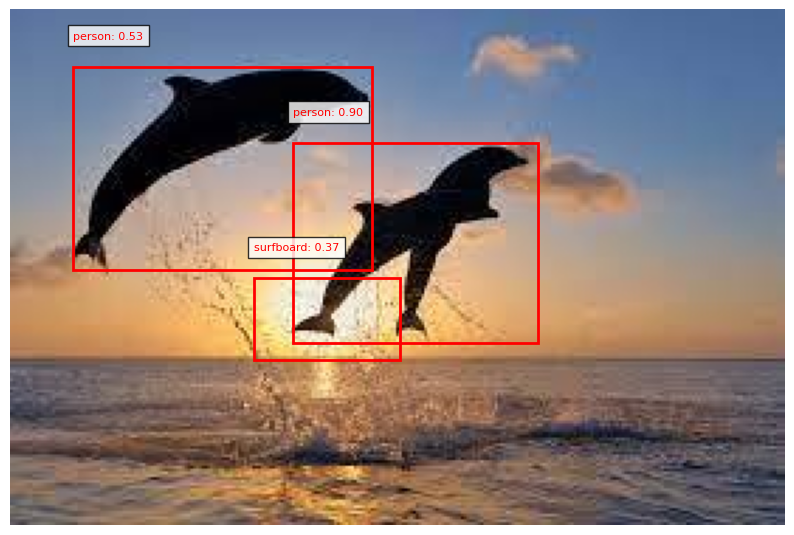

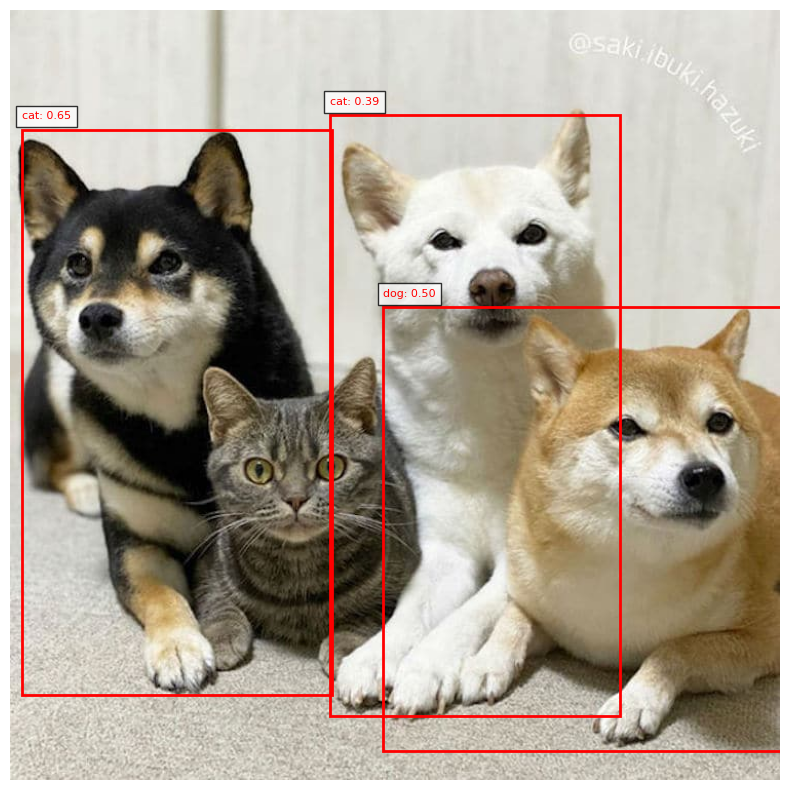

In [10]:
#Insert the inference code here.
%matplotlib inline
import cv2
from matplotlib import pyplot as plt

with torch.no_grad():
    images = [img1, img2]
    detections = model(images)
    detection_frames = detections.pandas().xyxy
    
    for idx, detection_frame in enumerate(detection_frames):
        image = cv2.cvtColor(cv2.imread(images[idx]), cv2.COLOR_BGR2RGB)
        height, width, _ = image.shape
        
        plt.figure(figsize=(10, 10))
        plt.imshow(image)
        
        # Draw bounding boxes and labels
        for _, detection in detection_frame.iterrows():
            xmin, ymin, xmax, ymax = map(int, [detection['xmin'], detection['ymin'], detection['xmax'], detection['ymax']])
            label = f"{detection['name']}: {detection['confidence']:.2f}"
            
            # Draw bounding box and label
            plt.gca().add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, 
                                              fill=False, color='red', linewidth=2))
            plt.text(xmin, ymin - 10, label, color='red', fontsize=8, 
                     bbox=dict(facecolor='white', alpha=0.8))
        
        plt.axis('off')
        plt.show()
    
    


### Question 1

Analyze the inference results of the 2 images. 
1. How well did the model detect the objects in the pictures? with what confidance?
2. What can possibly be the reason for the model failures? suggest methods to resolve that issue.
3. recall that we learned how to fool a model by adverserial attack (PGD), describe how you would attack an Object Detection model (such as YOLO).

In [1]:

from cs236781.answers import display_answer
import hw2.answers
display_answer(hw2.answers.part6_q1)



**Your answer:**

1.
First image:

The model failed to recognize the dolphins, instead detecting a bird and a person, with relatively high confidence.

Second imge:

 The model identified two dogs on the right and a cat on the left, but the bounding box for the cat was mainly around a third dog.
   2.
   First image:
    The failure is because "dolphin" is not a class in the YOLOv3 model.
   The model likely detected a bird due to the sky and the dolphin's black color.
 To fix this, add dolphin images to the dataset, create a new dolphin class, and retrain the model.
   Include shadow images of dolphins to improve recognition.

   Second image:
   The cluttered image with many objects likely caused this issue.
    To fix we may try trainig the model on more dense pictures to try to show it how to distinguish between close objects.

    3. To attack an Object Detection model like YOLO using PGD:

- **Initialize Perturbation:** Add small random noise to the input image. 
- **Compute Gradient:** Calculate the gradient of the loss with respect to the input image. 
- **Update Perturbation:** Adjust the perturbation iteratively in the direction of the gradient. 
- **Clip Perturbation:** Ensure the perturbation stays within a specified range. 
- **Apply Perturbation:** Add the perturbation to the original image to create the adversarial example.



## Creative Detection Failures

<a id=part6_2></a>

Object detection pitfalls could be, for example: **occlusion** - when the objects are partially occlude, and thus missing important features, **model bias** - when a model learn some bias about an object, it could recognize it as something else in a different setup, and many others like **Deformation**, **Illumination conditions**, **Cluttered** or **textured background and blurring** due to moving objects.

**TODO**: Take pictures and that demonstrates 3 of the above object detection pitfalls, run inference and analyze the results.

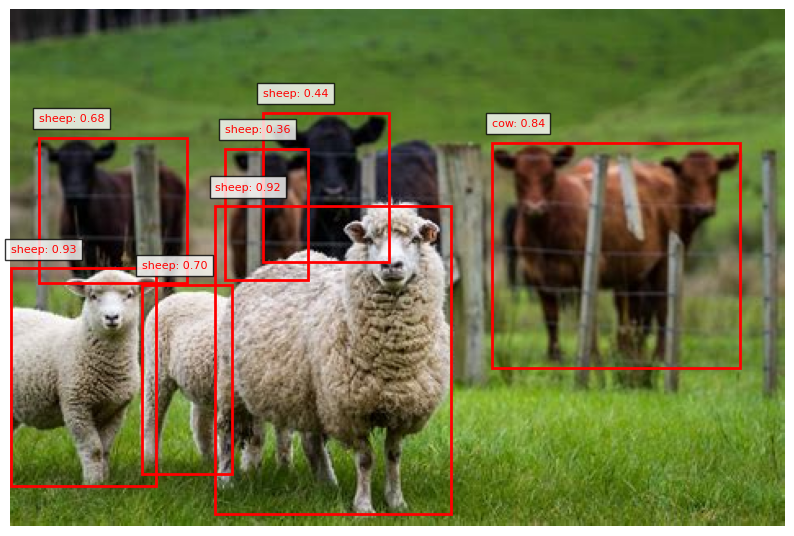

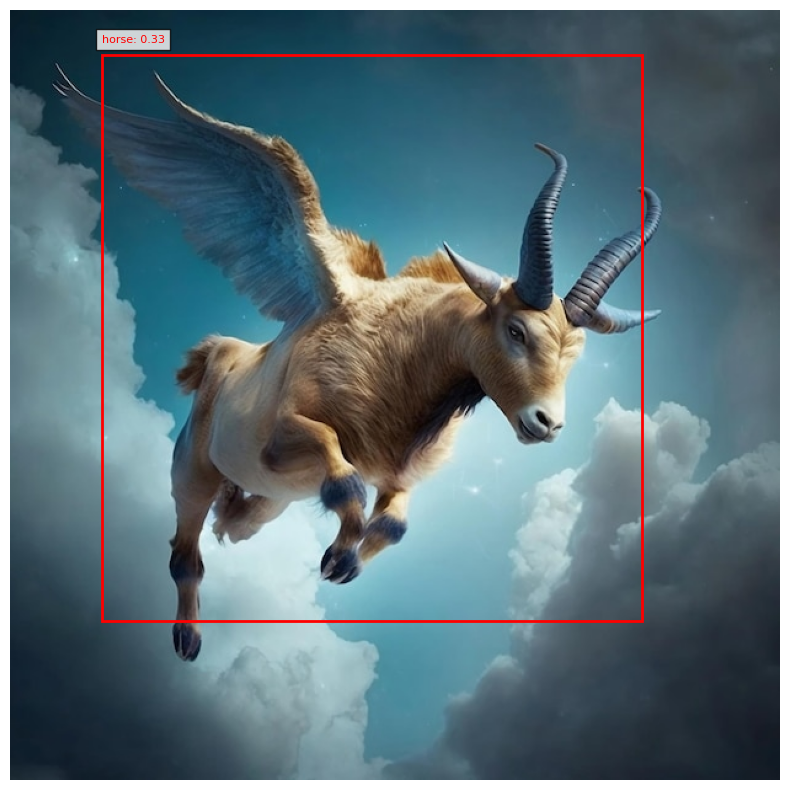

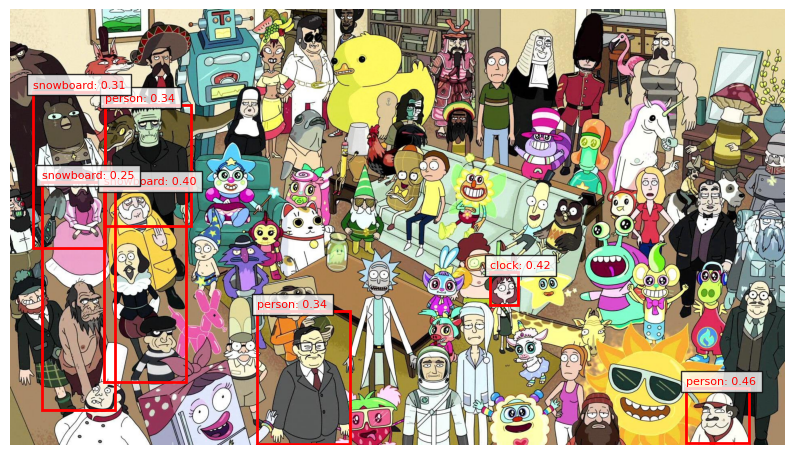

In [5]:

%matplotlib inline
import cv2
from matplotlib import pyplot as plt

with torch.no_grad():
    images = ['imgs/cow&sheeps.jpeg','imgs/flyingGoat.jpeg','imgs/whereRick.jpeg']
    detections = model(images)
    detection_frames = detections.pandas().xyxy
    
    for idx, detection_frame in enumerate(detection_frames):
        image = cv2.cvtColor(cv2.imread(images[idx]), cv2.COLOR_BGR2RGB)
        height, width, _ = image.shape
        
        plt.figure(figsize=(10, 10))
        plt.imshow(image)
        
        # Draw bounding boxes and labels
        for _, detection in detection_frame.iterrows():
            xmin, ymin, xmax, ymax = map(int, [detection['xmin'], detection['ymin'], detection['xmax'], detection['ymax']])
            label = f"{detection['name']}: {detection['confidence']:.2f}"
            
            # Draw bounding box and label
            plt.gca().add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, 
                                              fill=False, color='red', linewidth=2))
            plt.text(xmin, ymin - 10, label, color='red', fontsize=8, 
                     bbox=dict(facecolor='white', alpha=0.8))
        
        plt.axis('off')
        plt.show()
    
    


### Question 3

Analyize the results of the inference. 
1. How well did the model detect the objects in the pictures? explain.


In [ ]:
display_answer(hw2.answers.part6_q3)


## Bonus 
<a id=part6_3></a>

Try improving the model performance over poorly recognized images by changing them. 
Describe the manipulations you did to the pictures.

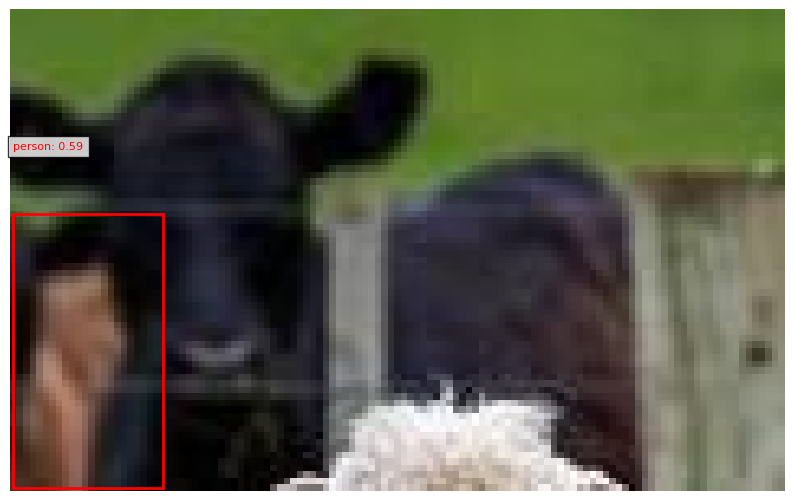

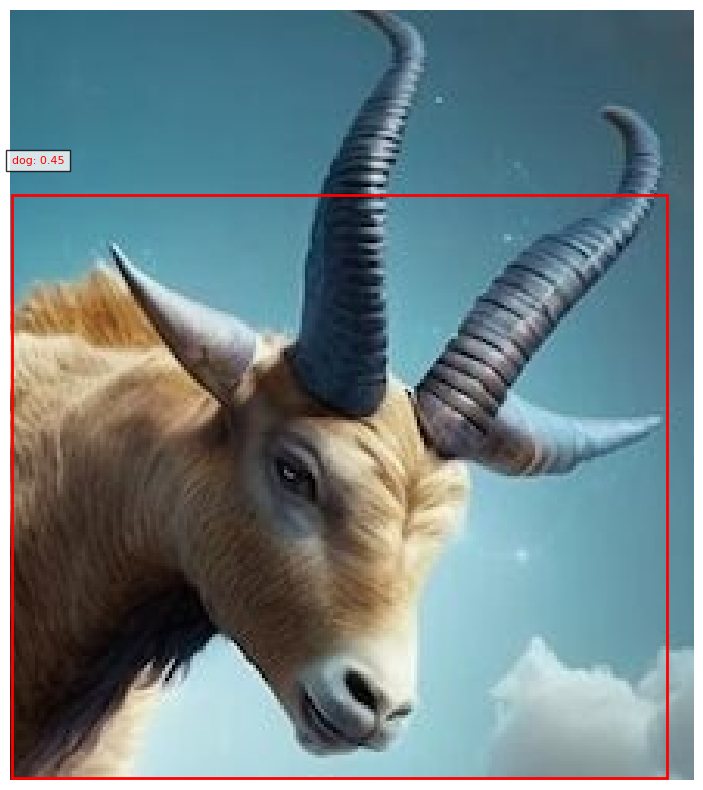

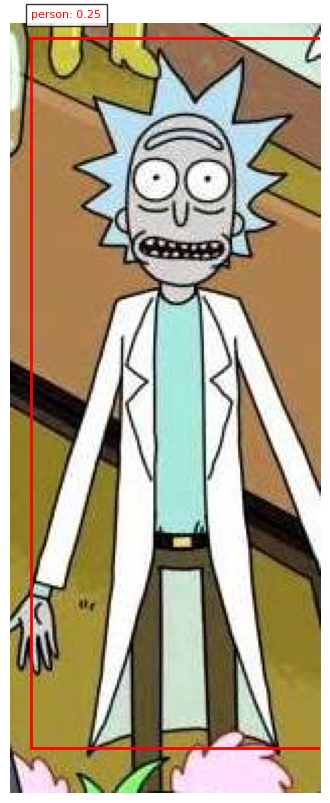

In [7]:
#insert bonus code here

%matplotlib inline
import cv2
from matplotlib import pyplot as plt

with torch.no_grad():
    images = ['imgs/cow&sheeps_cropped.jpeg','imgs/flyingGoat_cropped.jpeg','imgs/whereRick_cropped.jpeg']
    detections = model(images)
    detection_frames = detections.pandas().xyxy
    
    for idx, detection_frame in enumerate(detection_frames):
        image = cv2.cvtColor(cv2.imread(images[idx]), cv2.COLOR_BGR2RGB)
        height, width, _ = image.shape
        
        plt.figure(figsize=(10, 10))
        plt.imshow(image)
        
        # Draw bounding boxes and labels
        for _, detection in detection_frame.iterrows():
            xmin, ymin, xmax, ymax = map(int, [detection['xmin'], detection['ymin'], detection['xmax'], detection['ymax']])
            label = f"{detection['name']}: {detection['confidence']:.2f}"
            
            # Draw bounding box and label
            plt.gca().add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, 
                                              fill=False, color='red', linewidth=2))
            plt.text(xmin, ymin - 10, label, color='red', fontsize=8, 
                     bbox=dict(facecolor='white', alpha=0.8))
        
        plt.axis('off')
        plt.show()
    
    


In [ ]:
display_answer(hw2.answers.part6_bonus)
